In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk
plt.rcParams['figure.figsize']=(12,8)

In [2]:
def replace_string(data, column):
    k_columns = data[data[column].str.contains("K")]
    k_columns = k_columns.loc[k_columns[column]!='K']
    k_columns[column] = k_columns[column].str.strip('K').astype('float') * 1000
    m_columns = data[data[column].str.contains("M")]
    m_columns = m_columns.loc[m_columns[column]!='M']
    m_columns[column] = m_columns[column].str.strip('M').astype('float') * 1e6
    b_columns = data[data[column].str.contains("B")]
    b_columns = b_columns.loc[b_columns[column]!='B']
    b_columns[column] = b_columns[column].str.strip('B').astype('float') * 1e9
    columns = pd.concat([k_columns, m_columns, b_columns], axis=0)
    
    columns = columns.sort_index()
    
    return columns

In [3]:
%%time
storm_events = []
init_path = '/Users/allanbellahsene/Desktop/THESIS/DATA/NCFEI/StormEvents_'
for years in list(np.arange(1962,2020)):
    path = init_path + str(years) + '.csv'
    storm_data = pd.read_csv(path, usecols=['BEGIN_DAY', 'MONTH_NAME', 'YEAR', 'STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'EVENT_TYPE', 'EPISODE_ID', 'EVENT_ID', 'DEATHS_DIRECT', 'DEATHS_INDIRECT'])
    storm_data.index = pd.to_datetime(storm_data['BEGIN_DAY'].astype('str')+ '-' + storm_data['MONTH_NAME'] + '-' + storm_data.YEAR.astype('str'))
    storm_data = storm_data[['STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'EVENT_TYPE', 'EVENT_ID', 'EPISODE_ID']] #keep only relevant columns
    storm_data.dropna(inplace=True) #drop missing values
    storm_data.sort_index(inplace=True) #sort data by date
    storm_events.append(storm_data)
    #print(years)
STORMS = pd.concat([storm_events[0], storm_events[1]], axis=0)
for i in range(2, len(storm_events)):
    STORMS = pd.concat([STORMS, storm_events[i]], axis=0)
print(STORMS.shape)
df = STORMS
df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].astype('str')
df['DAMAGE_CROPS'] = df['DAMAGE_CROPS'].astype('str')
STORMS = df
STORMS = STORMS.loc[((STORMS.DAMAGE_PROPERTY!='0') & (STORMS.DAMAGE_CROPS =='0')) | ((STORMS.DAMAGE_PROPERTY=='0') & (STORMS.DAMAGE_CROPS !='0')) | ((STORMS.DAMAGE_PROPERTY!='0') & (STORMS.DAMAGE_CROPS !='0'))]
STORMS = STORMS.loc[STORMS.DAMAGE_PROPERTY!='K'] #delete rows that only contain "K"
STORMS = STORMS.loc[STORMS.DAMAGE_CROPS!='K']
STORMS = replace_string(STORMS, 'DAMAGE_PROPERTY')
STORMS = replace_string(STORMS, 'DAMAGE_CROPS')
STORMS['TOTAL_DAMAGES'] = STORMS['DAMAGE_PROPERTY'] + STORMS['DAMAGE_CROPS']
STORMS['Date'] = STORMS.index
STORMS = STORMS[['Date','STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'TOTAL_DAMAGES', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'EVENT_TYPE', 'EVENT_ID', 'EPISODE_ID']]
df = STORMS.groupby(['STATE', 'Date']).agg({'TOTAL_DAMAGES':sum})
STORMS = STORMS.loc[STORMS['TOTAL_DAMAGES']!=0]
States = list(STORMS.STATE.unique())

(708372, 8)
CPU times: user 18.7 s, sys: 2.51 s, total: 21.2 s
Wall time: 22.3 s


In [43]:
STORMS

,Date,STATE,DAMAGE_PROPERTY,DAMAGE_CROPS,TOTAL_DAMAGES,DEATHS_DIRECT,DEATHS_INDIRECT,EVENT_TYPE,EVENT_ID,EPISODE_ID
1972-06-18,1972-06-18,FLORIDA,190000.0,5000.0,195000.0,0,0,Tornado,990000001,990000001.0
1972-06-18,1972-06-18,FLORIDA,10000.0,5000.0,15000.0,1,0,Tornado,990000002,990000001.0
1996-01-01,1996-01-01,MISSOURI,10000.0,0.0,10000.0,0,0,Winter Storm,5546429,2031319.0
1996-01-02,1996-01-02,KANSAS,8000.0,0.0,8000.0,1,0,Winter Storm,5536209,2404253.0
1996-01-02,1996-01-02,FLORIDA,1500.0,0.0,1500.0,0,0,Thunderstorm Wind,5538451,2404206.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-30,2019-12-30,WISCONSIN,384000.0,0.0,384000.0,0,0,Flood,863582,143837.0
2019-12-30,2019-12-30,OHIO,25000.0,0.0,25000.0,0,0,High Wind,870106,144846.0
2019-12-30,2019-12-30,NEW YORK,50000.0,0.0,50000.0,0,0,Strong Wind,865535,144202.0
2019-12-30,2019-12-30,OHIO,100000.0,0.0,100000.0,0,0,High Wind,870093,144846.0


In [46]:
STORMS = STORMS.loc[STORMS.index>='1996-01-01']

In [47]:
STORMS[['EVENT_TYPE', 'EPISODE_ID', 'STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']]

,EVENT_TYPE,EPISODE_ID,STATE,DAMAGE_PROPERTY,DAMAGE_CROPS,DEATHS_DIRECT,DEATHS_INDIRECT
1996-01-01,Winter Storm,2031319.0,MISSOURI,10000.0,0.0,0,0
1996-01-02,Winter Storm,2404253.0,KANSAS,8000.0,0.0,1,0
1996-01-02,Thunderstorm Wind,2404206.0,FLORIDA,1500.0,0.0,0,0
1996-01-02,Waterspout,2404205.0,FLORIDA,5000.0,0.0,0,0
1996-01-02,Thunderstorm Wind,2404204.0,FLORIDA,2000.0,0.0,0,0
...,...,...,...,...,...,...,...
2019-12-30,Flood,143837.0,WISCONSIN,384000.0,0.0,0,0
2019-12-30,High Wind,144846.0,OHIO,25000.0,0.0,0,0
2019-12-30,Strong Wind,144202.0,NEW YORK,50000.0,0.0,0,0
2019-12-30,High Wind,144846.0,OHIO,100000.0,0.0,0,0


In [32]:
df = STORMS.loc[(STORMS.index>='1996-01-01') & ((STORMS.index<='2020-01-01'))]

In [33]:
df=df.rename(columns={"EPISODE_ID": "Occurences"})

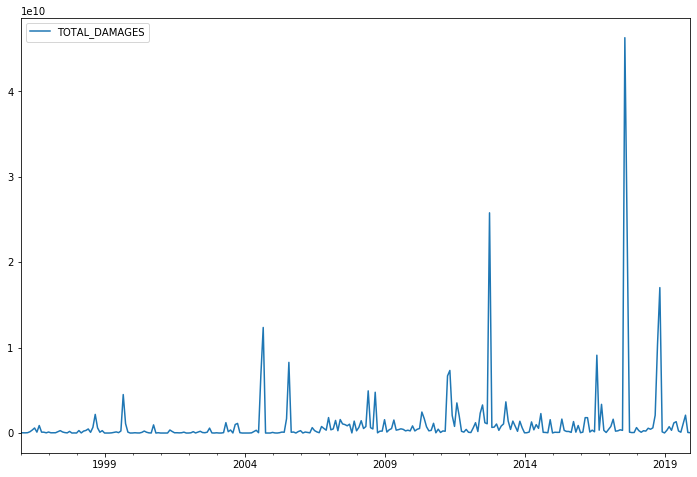

In [34]:
df[['TOTAL_DAMAGES']].resample('M').sum().plot()
plt.savefig('FinancialLosses.png')

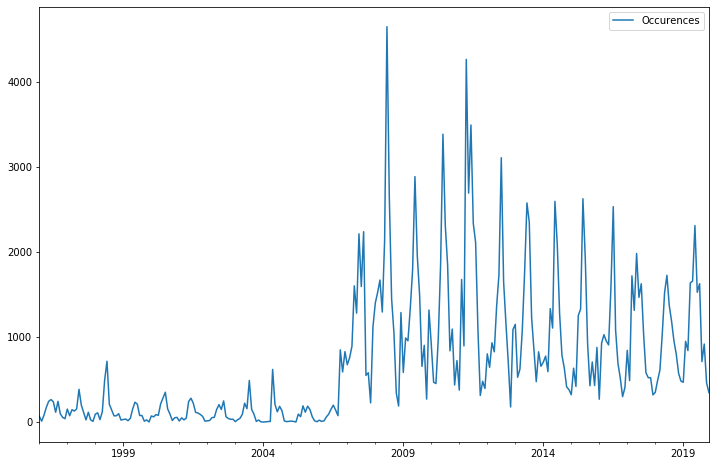

In [35]:
df[['Occurences']].resample('M').count().plot()

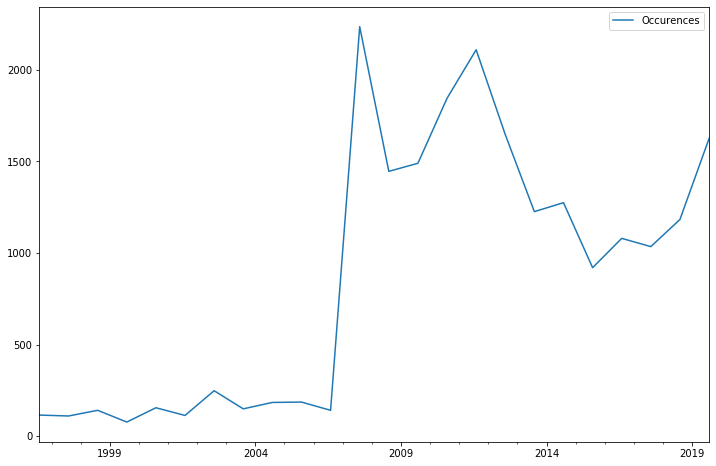

In [38]:
subdf = df[['Occurences']].resample('M').count()
subdf[subdf.index.astype('str').str.contains('-08-31')].plot()

In [14]:
subdf

,Occurences
1996-01-31,68
1996-02-29,10
1996-03-31,81
1996-04-30,172
1996-05-31,243
...,...
2011-09-30,1082
2011-10-31,312
2011-11-30,479
2011-12-31,394


In [8]:
df

,Date,STATE,DAMAGE_PROPERTY,DAMAGE_CROPS,TOTAL_DAMAGES,DEATHS_DIRECT,DEATHS_INDIRECT,EVENT_TYPE,EVENT_ID,Occurences
1996-01-01,1996-01-01,MISSOURI,10000.0,0.0,10000.0,0,0,Winter Storm,5546429,2031319.0
1996-01-02,1996-01-02,KANSAS,8000.0,0.0,8000.0,1,0,Winter Storm,5536209,2404253.0
1996-01-02,1996-01-02,FLORIDA,1500.0,0.0,1500.0,0,0,Thunderstorm Wind,5538451,2404206.0
1996-01-02,1996-01-02,FLORIDA,5000.0,0.0,5000.0,0,0,Waterspout,5538450,2404205.0
1996-01-02,1996-01-02,FLORIDA,2000.0,0.0,2000.0,0,0,Thunderstorm Wind,5538449,2404204.0
...,...,...,...,...,...,...,...,...,...,...
2012-01-01,2012-01-01,IOWA,10000.0,0.0,10000.0,0,0,High Wind,353055,58909.0
2012-01-01,2012-01-01,OREGON,500.0,0.0,500.0,0,0,High Wind,354478,59241.0
2012-01-01,2012-01-01,TEXAS,0.0,4000.0,4000.0,0,0,Drought,360725,59795.0
2012-01-01,2012-01-01,OHIO,125000.0,0.0,125000.0,0,0,Lake-Effect Snow,356617,59650.0


In [12]:
def get_occurences(clim_data, type_disaster, start_date, end_date):
    import pymannkendall as mk
    import pandas as pd
    import numpy as np
    if type_disaster == 'All':
        data = clim_data.loc[(clim_data.index>=start_date)&(clim_data.index<=end_date)]
    else:
        data = clim_data.loc[(clim_data.index>=start_date)&(clim_data.index<=end_date) & (clim_data.EVENT_TYPE==type_disaster)]
    
    States = list(data.STATE.unique())
    occ = []
    for state in States:
        subdf = data.loc[data.STATE==state]
        subdf = subdf[['EPISODE_ID', 'STATE']].drop_duplicates(subset=['EPISODE_ID']).resample('M').count()
        occ.append(subdf)
    occ = [x for x in occ if len(x)>10]
    
    States = list(clim_data.STATE.unique())
    for i in range(len(occ)):
        occ[i].STATE.iloc[:] = States[i]
    
    return occ
    

In [8]:
STORMS.EVENT_TYPE.unique()

array(['Tornado', 'Winter Storm', 'Thunderstorm Wind', 'Waterspout',
       'High Wind', 'Flash Flood', 'Flood', 'Cold/Wind Chill',
       'Ice Storm', 'Hail', 'Lightning', 'Drought', 'Hurricane (Typhoon)',
       'Storm Surge/Tide', 'Wildfire', 'Heavy Rain', 'Heavy Snow',
       'Blizzard', 'Frost/Freeze', 'Winter Weather', 'Dense Fog',
       'Strong Wind', 'Tropical Storm', 'Dust Storm',
       'Extreme Cold/Wind Chill', 'Debris Flow', 'Coastal Flood', 'Heat',
       'Marine Thunderstorm Wind', 'Landslide', 'Lake-Effect Snow',
       'High Surf', 'Lakeshore Flood', 'Tsunami', 'Seiche',
       'Marine Strong Wind', 'Avalanche', 'Hurricane', 'Dense Smoke',
       'Freezing Fog', 'Dust Devil', 'Funnel Cloud', 'Marine High Wind',
       'Marine Hail', 'Tropical Depression', 'Rip Current',
       'Excessive Heat', 'Sleet', 'Marine Hurricane/Typhoon',
       'Marine Lightning', 'Marine Dense Fog', 'Sneakerwave'],
      dtype=object)

In [17]:
occ = get_occurences(clim_data=STORMS, type_disaster='All', start_date='1996-01-01', end_date='2020-01-01')

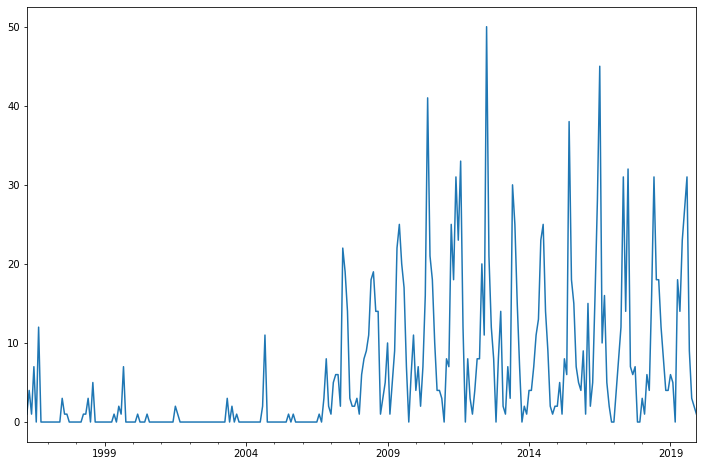

In [21]:
occ[20]['EPISODE_ID'].plot()

In [9]:
def rank_per_trend(clim_data, start_date, end_date):
    import pymannkendall as mk
    import pandas as pd
    import numpy as np
    data = clim_data.loc[(clim_data.index>=start_date)&(clim_data.index<=end_date)]
    States = list(data.STATE.unique())
    occ = []
    for state in States:
        subdf = data.loc[data.STATE==state]
        subdf = subdf[['EPISODE_ID', 'STATE']].drop_duplicates(subset=['EPISODE_ID']).resample('M').count()
        occ.append(subdf)
    occ = [x for x in occ if len(x)>10]
    trends = []
    for i in range(len(occ)):
        occ[i].STATE.iloc[:] = States[i]
        state = occ[i].STATE.iloc[0]
        trend,h,p,z,Tau,s,var_s,slope,intercept = mk.seasonal_test(occ[i][['EPISODE_ID']], period=12)
        trends.extend((state, trend, slope, p))
        
    trends=np.array(trends).reshape((int(len(trends)/4), 4))
    trends = pd.DataFrame(trends, columns=['State', 'Trend', 'Slope', 'P-value'])
    trends['Slope'] = trends['Slope'].astype('float')
    trends['P-value'] = trends['P-value'].astype('float')
    trends = trends.loc[trends['P-value']<0.05]
    trends = trends.sort_values(by="Slope", ascending=False)
    trends.reset_index(inplace=True)
    trends.drop(columns=['index'], inplace=True)
    
    return trends

In [17]:
rank_per_trend(STORMS, '1996-01-01', '2015-01-01')

,State,Trend,Slope,P-value
0,TEXAS,increasing,0.727273,6.438339e-11
1,NEW YORK,increasing,0.422619,3.885781e-14
2,GEORGIA,increasing,0.400000,0.000000e+00
3,KENTUCKY,increasing,0.384615,5.181633e-12
4,PENNSYLVANIA,increasing,0.375000,0.000000e+00
5,ARKANSAS,increasing,0.375000,0.000000e+00
6,CALIFORNIA,increasing,0.333333,0.000000e+00
7,OHIO,increasing,0.333333,0.000000e+00
8,FLORIDA,increasing,0.333333,0.000000e+00
9,NORTH CAROLINA,increasing,0.307692,0.000000e+00


In [153]:
STORMS = STORMS.loc[STORMS.index>='1996-01-01']

In [18]:
occ = []
for state in States:
    subdf = STORMS.loc[STORMS.STATE==state]
    subdf = subdf[['EPISODE_ID', 'STATE']].drop_duplicates(subset=['EPISODE_ID']).resample('M').count()
    occ.append(subdf)
for i in range(len(occ)):
    occ[i].STATE.iloc[:] = States[i]


In [21]:
occ[1]

,EPISODE_ID,STATE
1996-01-31,2,MISSOURI
1996-02-29,1,MISSOURI
1996-03-31,3,MISSOURI
1996-04-30,29,MISSOURI
1996-05-31,22,MISSOURI
...,...,...
2019-08-31,12,MISSOURI
2019-09-30,2,MISSOURI
2019-10-31,4,MISSOURI
2019-11-30,2,MISSOURI


In [31]:
import statsmodels.api as sm
Y = occ[1]['EPISODE_ID'].values.reshape(-1,1)
t = np.arange(0, len(Y)).reshape(-1,1)
#model = sm.OLS(Y,X)
#results = model.fit()
#print(results.summary())

In [32]:
X = sm.add_constant(t)

In [37]:
occ[1]['EPISODE_ID'].shift(1)

1996-01-31     NaN
1996-02-29     2.0
1996-03-31     1.0
1996-04-30     3.0
1996-05-31    29.0
              ... 
2019-08-31     7.0
2019-09-30    12.0
2019-10-31     2.0
2019-11-30     4.0
2019-12-31     2.0
Freq: M, Name: EPISODE_ID, Length: 288, dtype: float64

In [58]:
AR = occ[10]['EPISODE_ID'].shift(1)
AR = AR.iloc[1:].values.reshape(-1,1)
Y = occ[10]['EPISODE_ID'].iloc[1:].values.reshape(-1,1)
trend = np.arange(0, len(Y)).reshape(-1,1)
X = np.concatenate((trend, AR), axis=1)
X = sm.add_constant(X)
X = pd.DataFrame(X, columns=['Constant', 'Trend', 'AR'])




In [59]:
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     12.23
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           8.04e-06
Time:                        19:41:54   Log-Likelihood:                -185.71
No. Observations:                 287   AIC:                             377.4
Df Residuals:                     284   BIC:                             388.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      -0.0476      0.055     -0.869      0.3

In [33]:
def rank_per_trend(clim_data, start_date, end_date):
    import pymannkendall as mk
    import pandas as pd
    import numpy as np
    data = clim_data.loc[(clim_data.index>=start_date)&(clim_data.index<=end_date)]
    States = list(data.STATE.unique())
    occ = []
    for state in States:
        subdf = data.loc[data.STATE==state]
        subdf = subdf[['EPISODE_ID', 'STATE']].drop_duplicates(subset=['EPISODE_ID']).resample('M').count()
        occ.append(subdf)
    for i in range(len(occ)):
        occ[i].STATE.iloc[:] = States[i]
        state = occ[i].STATE.iloc[0]
        trend,h,p,z,Tau,s,var_s,slope,intercept = mk.seasonal_test(occ[i][['EPISODE_ID']], period=12)
        trends.extend((state, trend, slope))
        
    trends=np.array(trends).reshape((int(len(trends)/3), 3))
    trends = pd.DataFrame(trends, columns=['State', 'Trend', 'Slope'])
    trends['Slope'] = trends['Slope'].astype('float')
    trends = trends.sort_values(by="Slope", ascending=False)
    trends.reset_index(inplace=True)
    trends.drop(columns=['index'], inplace=True)
    
    return trends
        
    

In [247]:
occ = [x for x in occ if len(x)>2]
trends = []
for i in range(len(occ)):
    state = occ[i].STATE.iloc[0]
    trend,h,p,z,Tau,s,var_s,slope,intercept = mk.seasonal_test(occ[i][['EPISODE_ID']], period=12)
    trends.extend((state, trend, slope))
trends=np.array(trends).reshape((int(len(trends)/3), 3))
trends = pd.DataFrame(trends, columns=['State', 'Trend', 'Slope'])
trends['Slope'] = trends['Slope'].astype('float')
trends = trends.sort_values(by="Slope", ascending=False)
trends.reset_index(inplace=True)
trends.drop(columns=['index'], inplace=True)
trends.iloc[:50]
    

,State,Trend,Slope
0,TEXAS,increasing,0.444444
1,NEW YORK,increasing,0.416667
2,OHIO,increasing,0.341667
3,FLORIDA,increasing,0.333333
4,PENNSYLVANIA,increasing,0.333333
5,NORTH CAROLINA,increasing,0.315789
6,KENTUCKY,increasing,0.285714
7,MISSISSIPPI,increasing,0.285714
8,CALIFORNIA,increasing,0.277778
9,ARKANSAS,increasing,0.235294


In [242]:
occ[61]

,EPISODE_ID,STATE
2008-06-30,1,LAKE ST CLAIR


In [226]:
fo

,EPISODE_ID,STATE
1996-01-31,1,KANSAS
1996-02-29,0,KANSAS
1996-03-31,0,KANSAS
1996-04-30,2,KANSAS
1996-05-31,20,KANSAS
...,...,...
2019-06-30,8,KANSAS
2019-07-31,5,KANSAS
2019-08-31,18,KANSAS
2019-09-30,4,KANSAS


In [201]:
trend,h,p,z,Tau,s,var_s,slope,intercept = mk.seasonal_test(occ[0], period=12)

In [202]:
trend

'increasing'

In [203]:
h

True

In [204]:
p

0.0

In [205]:
z

10.542741728340559

In [206]:
Tau

0.4314613526570048

In [207]:
slope

0.3333333333333333

In [210]:
sen_slope = mk.seasonal_sens_slope(occ[0].values, period=12)[0]

In [211]:
sen_slope

0.3333333333333333